# Price Optimization using Python  

Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices. It involves competitive analysis to monitor market positioning, customer segmentation to identify varying willingness to pay, and the use of mathematical optimization algorithms to determine the best price points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Competition_Data.csv")

In [3]:
df.head()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32


In [4]:
df.tail()

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
99995,99995,2019-15,store_197,item_743,94.1,351,2629.98,10675.67,52.93
99996,99996,2019-15,store_197,item_743,94.1,351,2629.98,10675.67,171.17
99997,99997,2019-15,store_197,item_743,94.1,351,2629.98,10675.67,288.83
99998,99998,2019-15,store_197,item_743,94.1,351,2629.98,10675.67,133.77
99999,99999,2019-15,store_197,item_743,94.1,351,2629.98,10675.67,206.00


In [5]:
df.shape

(100000, 9)

In [6]:
df.columns

Index(['Index', 'Fiscal_Week_ID', 'Store_ID', 'Item_ID', 'Price',
       'Item_Quantity', 'Sales_Amount_No_Discount', 'Sales_Amount',
       'Competition_Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


In [8]:
df.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,167.017783,399.611320,4771.147859,11396.865217,174.280887
std,28867.657797,69.503418,59.440567,1524.737540,2091.246764,71.545584
min,0.000000,47.700000,285.000000,2003.700000,7613.560000,47.950000
25%,24999.750000,105.410000,348.000000,3481.460000,9551.590000,118.627500
50%,49999.500000,159.420000,401.000000,4746.530000,11240.020000,162.510000
75%,74999.250000,221.900000,451.000000,6045.477500,13175.230000,237.335000
max,99999.000000,310.660000,522.000000,7853.810000,15685.080000,313.640000


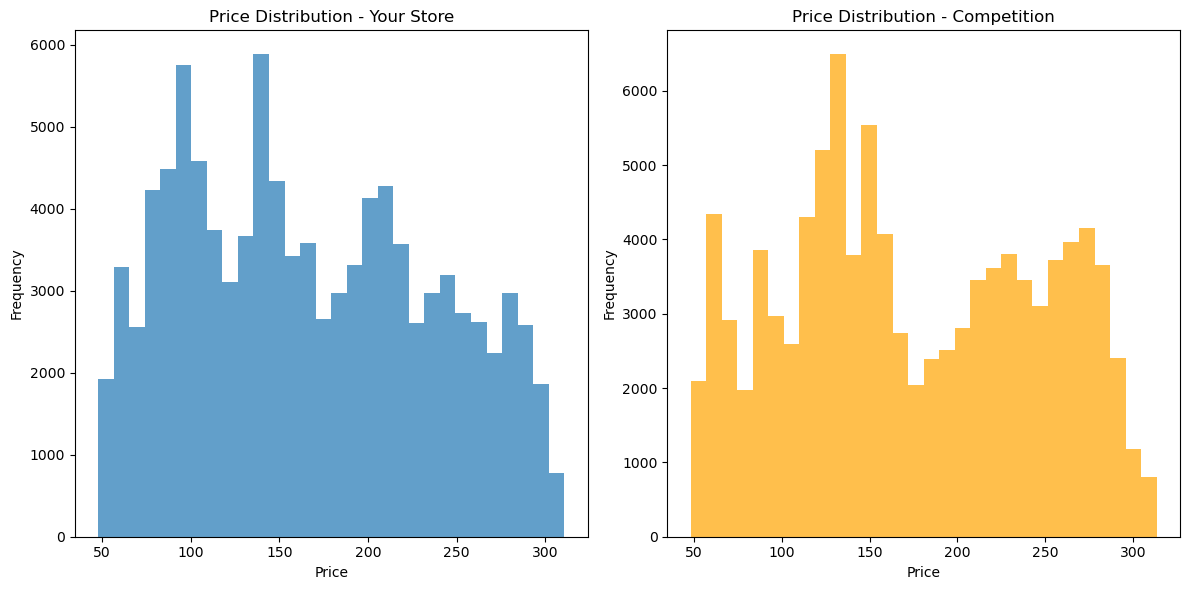

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(df['Competition_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

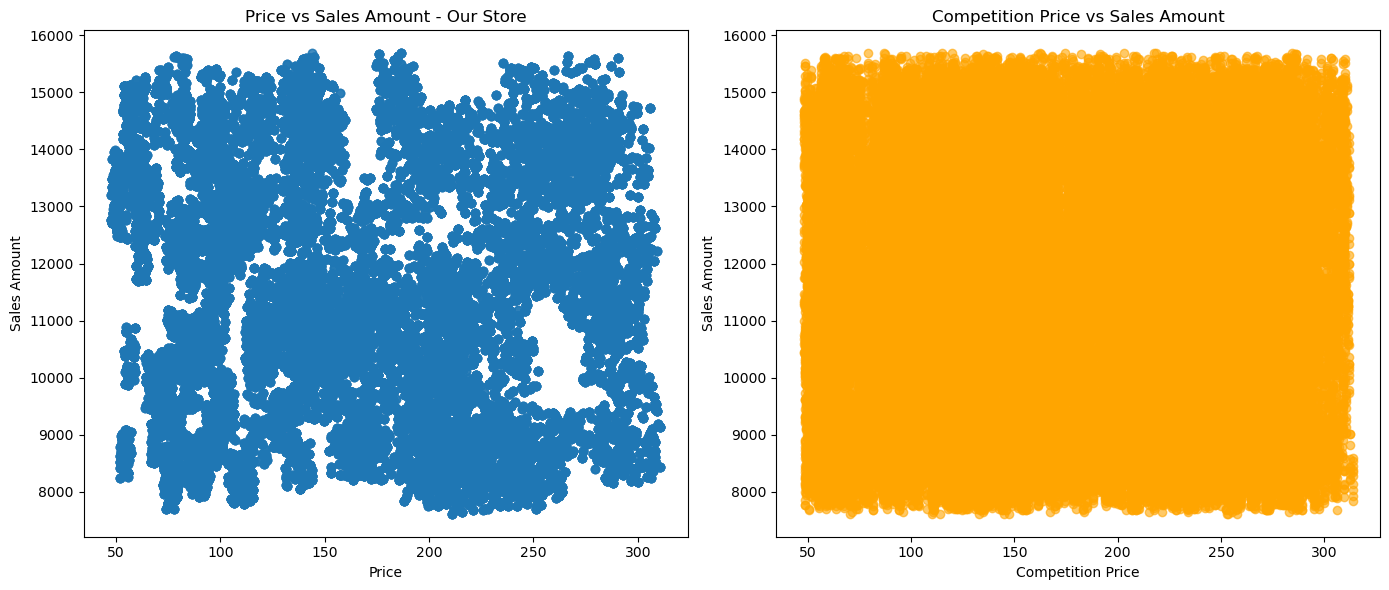

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Price'], df['Sales_Amount'], alpha=0.6, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(df['Competition_Price'], df['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount')

plt.tight_layout()
plt.show()

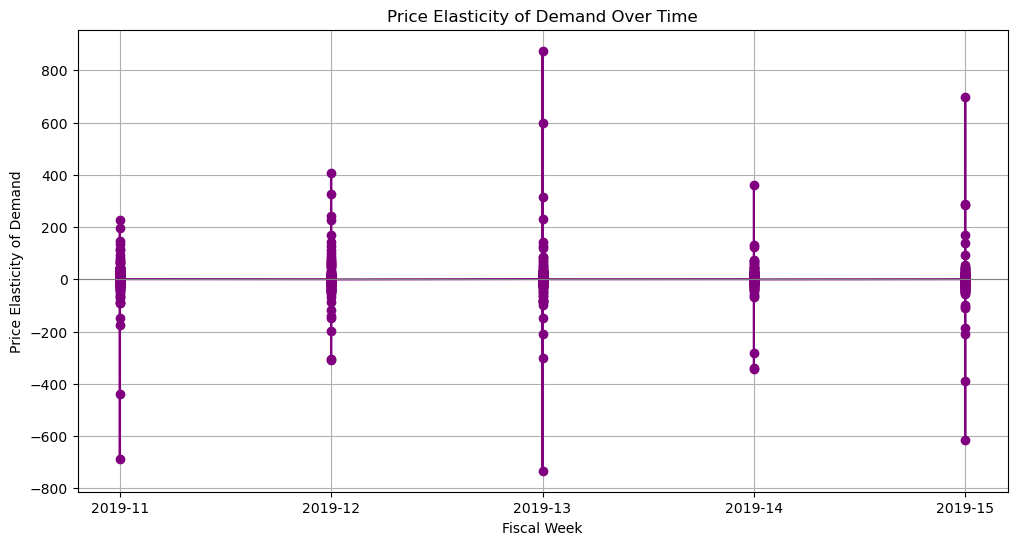

In [11]:
df['price_change'] = df['Price'].pct_change()
df['qty_change'] = df['Item_Quantity'].pct_change()

df['elasticity'] = df['qty_change'] / df['price_change']

df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
df.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Fiscal_Week_ID'], df['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

In [12]:
total_sales_your_store = df['Sales_Amount'].sum()
total_sales_competition = (df['Competition_Price'] * df['Item_Quantity']).sum()

total_qty_your_store = df['Item_Quantity'].sum()
total_qty_competition = df['Item_Quantity'].sum()  # assuming quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})


summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.141005e+08,6.962097e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [13]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
df['price_bracket'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
df['competition_price_bracket'] = pd.cut(df['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = df.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
df['competition_sales_amt'] = df['Competition_Price'] * df['Item_Quantity']
sales_by_bracket_competition = df.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


In [14]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = df.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
df = pd.merge(df, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
df['segment'] = pd.cut(df['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = df['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = df[df['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_13224\3686623094.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13224\3686623094.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
C:\Users\Admin\AppData\Local\Temp\ipykernel_13224\3686623094.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


In [15]:
# create a copy of the dataset for simulation
dynamic_pricing_data = df.copy()

# apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# calculate new sales amounts based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# compare total sales amount between existing and dynamic pricing
total_sales_existing = df['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# compare total quantity sold between existing and dynamic pricing
total_qty_existing = df['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()  # quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


In [16]:
df['dynamic_price'] = dynamic_pricing_data['dynamic_price']

In [17]:
df

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,Price_avg,Item_Quantity_avg,segment,dynamic_price
0,10,2019-11,store_709,item_526,136.79,459,4890.43,11545.08,206.44,0.017102,0.055172,3.226147,101-150,201-250,94755.96,132.061224,21792,Medium,143.6295
1,20,2019-11,store_442,item_526,138.67,458,4933.46,11517.46,206.44,0.013744,-0.002179,-0.158520,101-150,201-250,94549.52,132.061224,21792,Medium,145.6035
2,30,2019-11,store_136,item_526,128.93,459,4962.56,11216.19,206.44,-0.070239,0.002183,-0.031086,101-150,201-250,94755.96,132.061224,21792,Medium,135.3765
3,40,2019-11,store_601,item_526,134.45,436,4704.89,10980.31,206.44,0.042814,-0.050109,-1.170389,101-150,201-250,90007.84,132.061224,21792,Medium,141.1725
4,50,2019-11,store_458,item_526,134.13,435,4558.87,11168.10,206.44,-0.002380,-0.002294,0.963661,101-150,201-250,89801.40,132.061224,21792,Medium,140.8365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,99915,2019-15,store_458,item_117,55.52,449,6210.17,9021.43,182.25,0.049329,-0.002222,-0.045049,51-100,151-200,81830.25,54.342449,21307,Medium,58.2960
9987,99922,2019-15,store_162,item_117,54.19,425,5936.38,8746.34,182.25,-0.023955,-0.053452,2.231324,51-100,151-200,77456.25,54.342449,21307,Medium,56.8995
9988,99929,2019-15,store_30,item_117,52.74,453,6092.06,8599.93,182.25,-0.026758,0.065882,-2.462183,51-100,151-200,82559.25,54.342449,21307,Medium,55.3770
9989,99936,2019-15,store_594,item_117,56.19,425,5675.94,8552.51,182.25,0.065415,-0.061810,-0.944889,51-100,151-200,77456.25,54.342449,21307,Medium,58.9995
